In [1]:
import numpy as np
import pandas as pd

In [2]:
!pwd

/home/ec2-user/amazon


In [3]:
!python --version

Python 3.5.2 :: Anaconda 4.2.0 (64-bit)


In [4]:
!ls -la

total 3888
drwxrwxr-x 5 ec2-user ec2-user    4096 May 15 21:46 .
drwx------ 9 ec2-user ec2-user    4096 May  9 21:32 ..
drwxrwxr-x 5 ec2-user ec2-user    4096 May  9 22:25 data
-rw-r--r-- 1 root     root      142146 May 11 22:38 .~Data Exploration.ipynb
-rw-r--r-- 1 root     root     3809790 May 12 00:20 Data visualization.ipynb
drwxrwxr-x 7 ec2-user ec2-user    4096 May  9 05:19 .git
drwxr-xr-x 2 root     root        4096 May 15 21:46 .ipynb_checkpoints
-rw-rw-r-- 1 ec2-user ec2-user       8 May  8 23:57 README.md


In [5]:
!ls -la ./data/train-jpg/*.jpg | wc -l

40479


In [6]:
df_labels = pd.read_csv('./data/train-csv/train.csv')
df_labels.head(10)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [7]:
labels = df_labels.tags.values
labels

array(['haze primary', 'agriculture clear primary water', 'clear primary',
       ..., 'agriculture clear primary', 'agriculture clear primary road',
       'agriculture cultivation partly_cloudy primary'], dtype=object)

In [8]:
labels_list = []
for lbl in labels:
    labels_list.extend(lbl.split(' '))
labels_set = set(labels_list)
labels_set

{'agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water'}

In [9]:
for i, label in enumerate(labels_set):
    print('label:%s  %d/%d' %(label, i+1, len(labels_set)))
    %time df_labels[label] = df_labels.tags.apply(lambda x : 1 if label in x.split(' ') else 0)


label:habitation  1/17
CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 34.6 ms
label:artisinal_mine  2/17
CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 34.1 ms
label:cloudy  3/17
CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 34.1 ms
label:selective_logging  4/17
CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 34.1 ms
label:partly_cloudy  5/17
CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 34.2 ms
label:blooming  6/17
CPU times: user 32 ms, sys: 4 ms, total: 36 ms
Wall time: 35.2 ms
label:haze  7/17
CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 34.2 ms
label:bare_ground  8/17
CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 34.3 ms
label:water  9/17
CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 34.6 ms
label:conventional_mine  10/17
CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 33.8 ms
label:agriculture  11/17
CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 33.7 ms
label:clear  

In [10]:
df_labels

,image_name,tags,habitation,artisinal_mine,cloudy,selective_logging,partly_cloudy,blooming,haze,bare_ground,water,conventional_mine,agriculture,clear,slash_burn,primary,blow_down,road,cultivation
0,train_0,haze primary,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,train_1,agriculture clear primary water,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0
2,train_2,clear primary,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,train_3,clear primary,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,train_4,agriculture clear habitation primary road,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0
5,train_5,haze primary water,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
6,train_6,agriculture clear cultivation primary water,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1
7,train_7,haze primary,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,train_8,agriculture clear cultivation primary,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
9,train_9,agriculture clear cultivation primary road,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1


In [11]:
df_train = df_labels.tags.str.get_dummies(' ')
df_train.insert(0, 'image_name', df_labels.image_name)
df_train.head(10)

,image_name,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,train_2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,train_3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,train_4,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
5,train_5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
6,train_6,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
7,train_7,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8,train_8,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
9,train_9,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [12]:
%matplotlib inline

In [13]:
df_train[list(labels_set)].sum().sort_values()

blow_down               98
conventional_mine      100
slash_burn             209
blooming               332
artisinal_mine         339
selective_logging      340
bare_ground            859
cloudy                2330
haze                  2695
habitation            3662
cultivation           4477
partly_cloudy         7251
water                 7262
road                  8076
agriculture          12338
clear                28203
primary              37840
dtype: int64

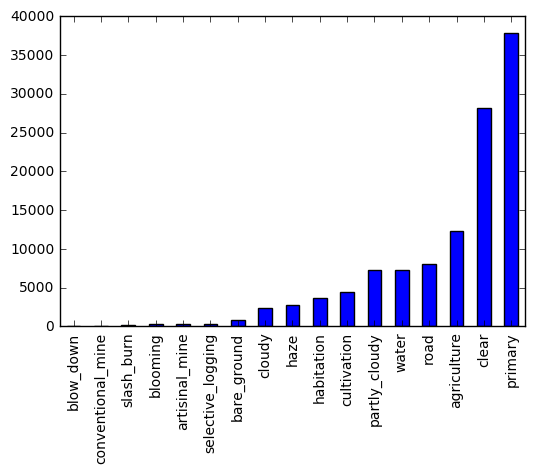

In [14]:
df_train[list(labels_set)].sum().sort_values().plot(kind='bar')

In [15]:
ordered_labels = df_train[list(labels_set)].sum().sort_values(ascending=False).index
type(ordered_labels)

pandas.indexes.base.Index

In [16]:
df_train[ordered_labels].corr()

,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,conventional_mine,blow_down
primary,1.000000,0.283810,0.099210,0.045952,0.070012,0.103009,0.086107,0.016655,0.059691,-0.793606,-0.083321,0.024305,0.007798,0.024015,0.019025,0.001047,0.013010
clear,0.283810,1.000000,0.064648,0.089860,0.030442,-0.708053,0.069867,0.100905,-0.404804,-0.374589,0.054261,0.041876,0.041759,0.047483,0.020534,0.000354,0.018285
agriculture,0.099210,0.064648,1.000000,0.480014,0.070571,0.039452,0.344348,0.303242,-0.032171,-0.158110,-0.013712,-0.022718,-0.038472,-0.041173,0.041407,-0.007005,-0.008595
road,0.045952,0.089860,0.480014,1.000000,0.109259,-0.010423,0.078995,0.443161,-0.035629,-0.122052,0.065034,0.056333,0.028739,-0.038545,-0.004915,0.048626,-0.022078
water,0.070012,0.030442,0.070571,0.109259,1.000000,-0.002324,0.013307,0.057918,0.033450,-0.092056,0.023184,-0.008464,0.168284,-0.031098,-0.012124,0.010454,-0.019104
partly_cloudy,0.103009,-0.708053,0.039452,-0.010423,-0.002324,1.000000,-0.011085,-0.048282,-0.124759,-0.115447,-0.035704,-0.023934,-0.023842,-0.030337,-0.003989,0.013091,-0.005971
cultivation,0.086107,0.069867,0.344348,0.078995,0.013307,-0.011085,1.000000,0.134545,-0.030354,-0.087150,-0.003282,0.017603,-0.016849,-0.001502,0.113073,-0.011202,-0.004550
habitation,0.016655,0.100905,0.303242,0.443161,0.057918,-0.048282,0.134545,1.000000,-0.039663,-0.077202,0.050967,-0.016758,-0.001577,-0.024860,0.026548,0.046761,-0.010279
haze,0.059691,-0.404804,-0.032171,-0.035629,0.033450,-0.124759,-0.030354,-0.039663,1.000000,-0.066003,-0.011133,-0.019151,-0.019106,-0.019892,-0.015092,-0.009298,-0.013157
cloudy,-0.793606,-0.374589,-0.158110,-0.122052,-0.092056,-0.115447,-0.087150,-0.077202,-0.066003,1.000000,-0.036389,-0.022745,-0.022712,-0.022474,-0.017804,-0.012299,-0.012175


In [17]:
import seaborn as sns

In [18]:
df_occurence = df_train[ordered_labels].T.dot(df_train[ordered_labels])
df_occurence

,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,conventional_mine,blow_down
primary,37840,27668,11990,7733,7057,7173,4455,3471,2668,331,683,340,324,332,209,94,98
clear,27668,28203,9150,6295,5277,0,3527,3090,0,0,744,308,307,311,173,70,85
agriculture,11990,9150,12338,6036,2718,2492,3377,2737,672,24,225,65,38,32,119,24,22
road,7733,6295,6036,8076,2127,1382,1294,2787,394,5,323,151,110,10,36,59,2
water,7057,5277,2718,2127,7262,1287,868,915,613,85,206,49,299,16,24,26,3
partly_cloudy,7173,0,2492,1382,1287,7251,748,441,0,0,74,27,27,17,33,28,13
cultivation,4455,3527,3377,1294,868,748,4477,895,202,0,89,58,18,35,126,4,8
habitation,3471,3090,2737,2787,915,441,895,3662,129,2,163,13,29,4,41,36,3
haze,2668,0,672,394,613,0,202,129,2695,0,41,5,5,4,3,2,0
cloudy,331,0,24,5,85,0,0,2,0,2330,0,0,0,0,0,0,0


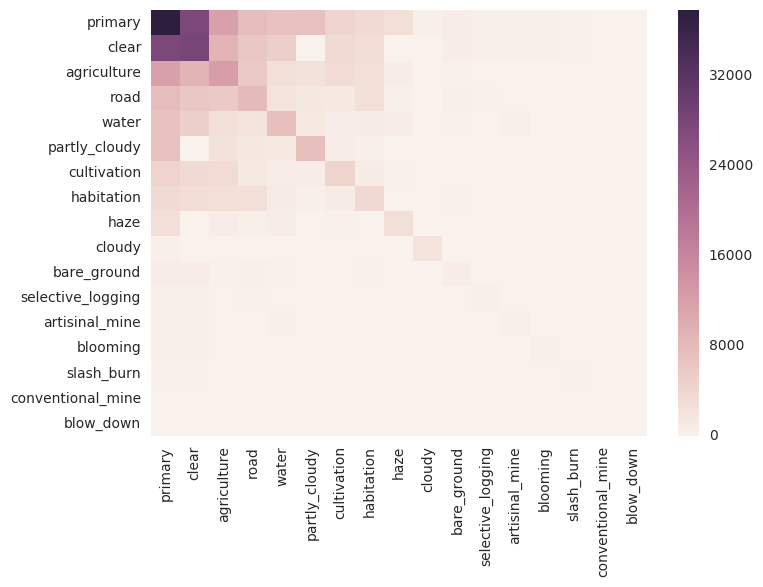

In [19]:
sns.heatmap(df_occurence)

In [20]:
df_percentage = df_train[ordered_labels].sum() / df_train[ordered_labels].count() * 100
df_percentage

primary              93.480570
clear                69.673164
agriculture          30.480002
road                 19.951086
water                17.940167
partly_cloudy        17.912992
cultivation          11.060056
habitation            9.046666
haze                  6.657773
cloudy                5.756071
bare_ground           2.122088
selective_logging     0.839942
artisinal_mine        0.837471
blooming              0.820178
slash_burn            0.516317
conventional_mine     0.247042
blow_down             0.242101
dtype: float64

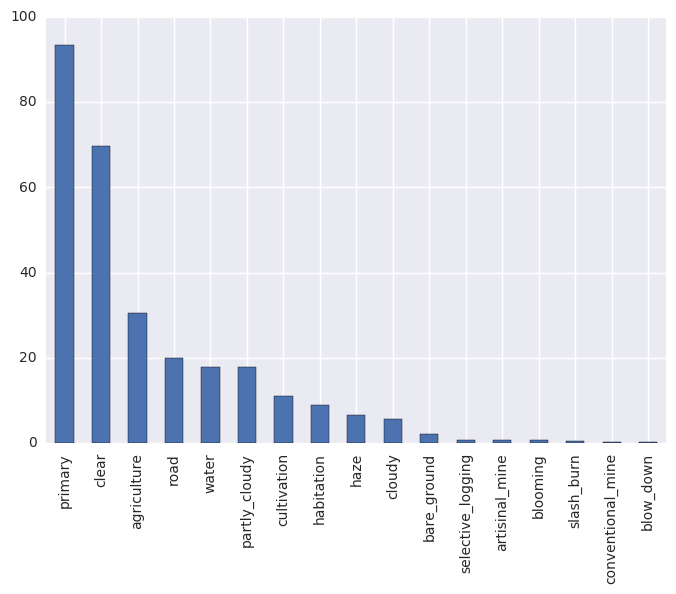

In [21]:
df_percentage.plot(kind='bar')

In [22]:
TRAIN_PATH = './data/train-jpg/'

In [23]:
import os

In [24]:
from PIL import Image
import random
import matplotlib.pyplot as plt

In [25]:
def plot_graph(label):

    images = df_train[df_train[label] == 1].image_name.values

    fig , ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
    ax = ax.flatten()

    for i in range(0,9):
        f = random.choice(images)
        img = Image.open(os.path.join(TRAIN_PATH, f + '.jpg'))
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title("%s h:%s w:%s" % (f, img.height,img.width))
    plt.tight_layout()

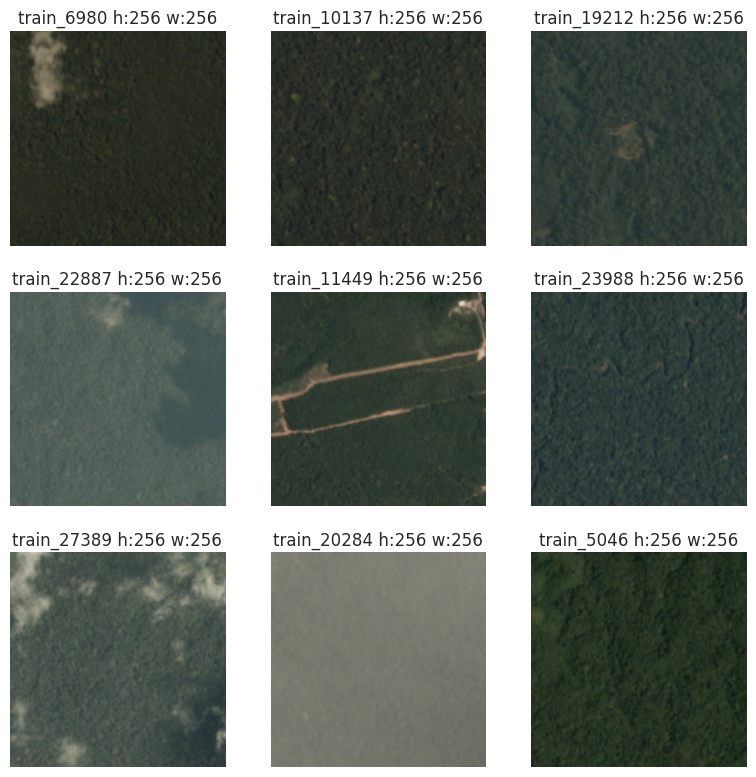

In [26]:
plot_graph('primary')

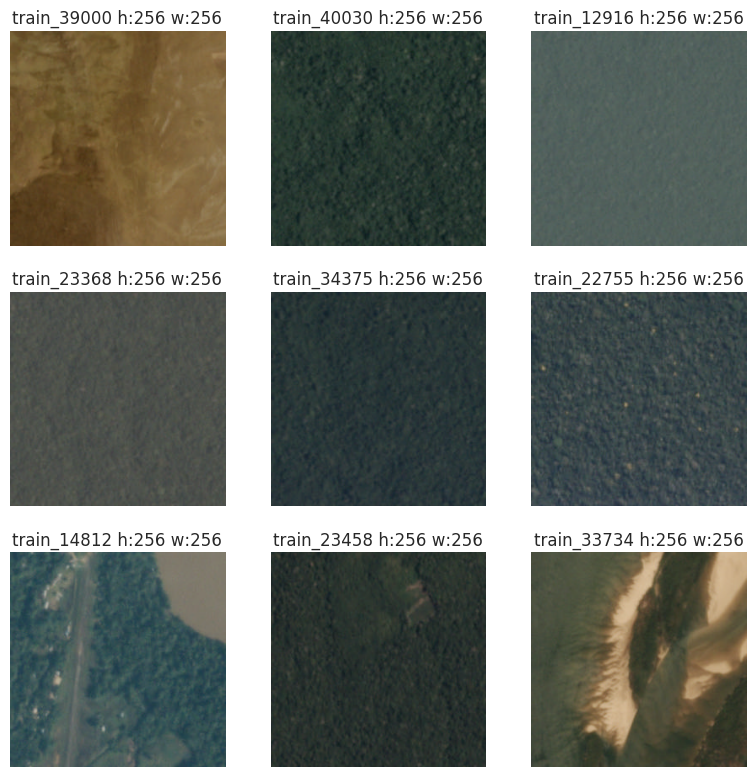

In [27]:
plot_graph('clear')

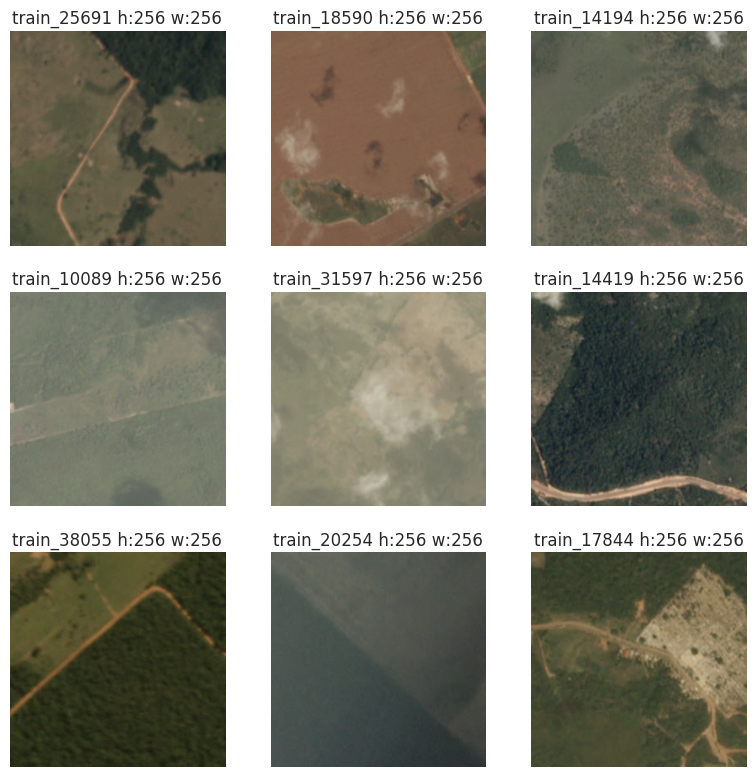

In [28]:
plot_graph('agriculture')

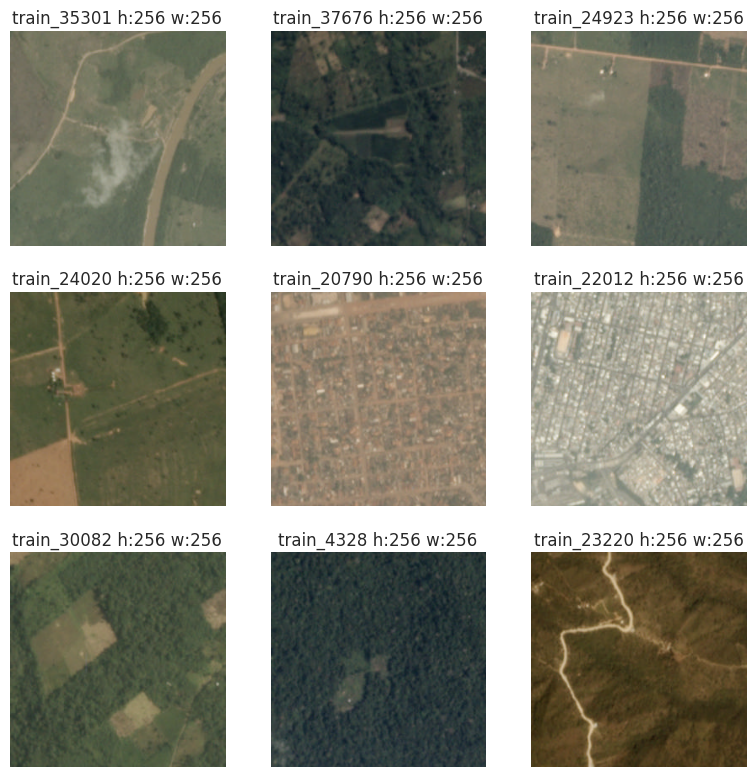

In [29]:
plot_graph('habitation')